In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# Projeto "Prevendo Nivel de Satisfação - Santander"
## Formação Cientista de Dados
### Projeto 02 - Curso de Big Data Analytics com Python e Spark




Autor: Alexadre Felix

Material de estudos e pesquisa, fique a vontade para copiar o código ou partes dele e modifica-los.
Em caso de reprodução, citar este arquivo fonte.

## 00 - Importacao e Conferencia dos Dados

In [2]:
arquivo = 'train.csv'
raw_data = pd.read_csv(arquivo)

raw_data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
# Conferindo os valores da coluna 'ID' pois parece ser uma lista de IDs unicos
raw_data['ID'].nunique()

76020

In [4]:
# Como não precisamos de valores de ID, iremos deletar a coluna do nosso dataset
raw_data = raw_data.drop(['ID'], axis = 1)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 370 entries, var3 to TARGET
dtypes: float64(111), int64(259)
memory usage: 214.6 MB


Todas as colunas possuem valores numericos

In [6]:
# Conferindo se existem valores nulos no dataset
raw_data.isnull().sum(axis = 0)

var3                             0
var15                            0
imp_ent_var16_ult1               0
imp_op_var39_comer_ult1          0
imp_op_var39_comer_ult3          0
imp_op_var40_comer_ult1          0
imp_op_var40_comer_ult3          0
imp_op_var40_efect_ult1          0
imp_op_var40_efect_ult3          0
imp_op_var40_ult1                0
imp_op_var41_comer_ult1          0
imp_op_var41_comer_ult3          0
imp_op_var41_efect_ult1          0
imp_op_var41_efect_ult3          0
imp_op_var41_ult1                0
imp_op_var39_efect_ult1          0
imp_op_var39_efect_ult3          0
imp_op_var39_ult1                0
imp_sal_var16_ult1               0
ind_var1_0                       0
ind_var1                         0
ind_var2_0                       0
ind_var2                         0
ind_var5_0                       0
ind_var5                         0
ind_var6_0                       0
ind_var6                         0
ind_var8_0                       0
ind_var8            

In [7]:
raw_data.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


## 01 - Analise Exploratória dos Dados

In [9]:
raw_data.groupby('TARGET').size()

TARGET
0    73012
1     3008
dtype: int64

Temos muito mais saídas de churn para não do que para sim, talvez seja necessário fazer o balanceamento das classes para apresentar os dados de treino.

In [9]:
# Verificando o skew
print(raw_data.skew())

var3                             -25.541574
var15                              1.578367
imp_ent_var16_ult1                67.267512
imp_op_var39_comer_ult1            9.454298
imp_op_var39_comer_ult3            9.735351
imp_op_var40_comer_ult1           45.834548
imp_op_var40_comer_ult3           38.671915
imp_op_var40_efect_ult1          149.528499
imp_op_var40_efect_ult3          112.951439
imp_op_var40_ult1                 52.578032
imp_op_var41_comer_ult1            9.226000
imp_op_var41_comer_ult3            9.546986
imp_op_var41_efect_ult1           36.667400
imp_op_var41_efect_ult3           61.994858
imp_op_var41_ult1                 20.996558
imp_op_var39_efect_ult1           36.249660
imp_op_var39_efect_ult3           61.422944
imp_op_var39_ult1                 20.476998
imp_sal_var16_ult1               181.054616
ind_var1_0                         9.181171
ind_var1                          16.211673
ind_var2_0                         0.000000
ind_var2                        

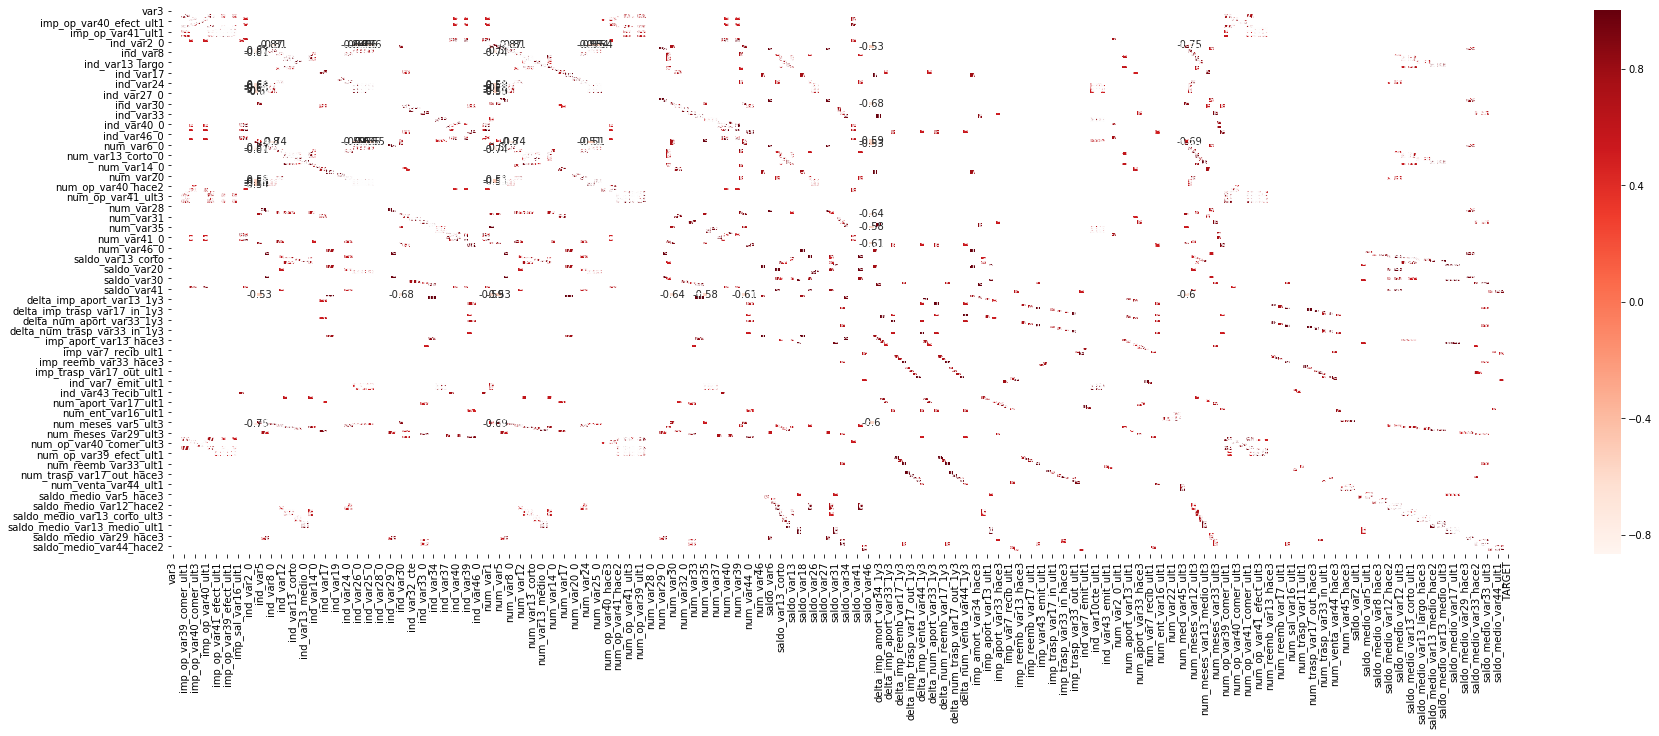

In [10]:
dfCorr = raw_data.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

Devido ao alto numero de features a matriz de correlação não é o método mais apropriado para conseguirmos interpretar as correlações. Partiremos para outro método.

## 02 - Balanceamento das Classes

In [8]:
from imblearn.over_sampling import SMOTE

# Criando novo dataset para ser balanceado

df_unbalanced = raw_data

x = df_unbalanced.iloc[:,0:-1]
y = df_unbalanced.iloc[:,-1]
# Balanceando variavel TARGET

sm = SMOTE(random_state=42)

X_r, y_r = sm.fit_resample(x, y)

In [9]:
X_r.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [10]:
target_balanced = pd.DataFrame(y_r)
target_balanced.head()

,TARGET
0,0
1,0
2,0
3,0
4,0


In [11]:
X_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146024 entries, 0 to 146023
Columns: 369 entries, var3 to var38
dtypes: float64(111), int64(258)
memory usage: 411.1 MB


In [12]:
target_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146024 entries, 0 to 146023
Data columns (total 1 columns):
TARGET    146024 non-null int64
dtypes: int64(1)
memory usage: 1.1 MB


In [13]:
df = pd.concat([X_r, target_balanced], axis = 1)
df.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [14]:
df.groupby('TARGET').size()

TARGET
0    73012
1    73012
dtype: int64

## 03 - Pré Processamento

### 03.1 - Criação do Primeiro Modelo
#### 03.1.1 - Normalização dos Dados

- Primeira versão do modelo utilizando normalização de dados.

In [16]:
from sklearn.preprocessing import Normalizer

# Criando dataset para o modelo

df_modelo = df

# Separando o array em componentes de input e output
array_treino = df_modelo.values

x_treino = array_treino[:,0:-1]
y_treino = array_treino[:,-1]

# Separando os dados entre teste e treino

# Gerando os dados normalizados
scaler_treino = Normalizer().fit(x_treino)
normalizedX_treino = scaler_treino.transform(x_treino)

In [17]:
normalizedX_treino

array([[5.10135077e-05, 5.86655339e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99996621e-01],
       [4.05808400e-05, 6.89874280e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99871926e-01],
       [2.97027433e-05, 3.41581548e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99998844e-01],
       ...,
       [1.75716316e-05, 2.89931921e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.93479700e-01],
       [1.70486959e-05, 2.81303482e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99999602e-01],
       [1.70486959e-05, 2.81303482e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99999602e-01]])

#### 03.1.2 - Seleção do Modelo

LR: 0.173717 (0.173284)
LDA: 0.708876 (0.051193)
KNN: 0.841780 (0.040985)
CART: 0.914843 (0.023316)
CART: 0.914316 (0.023436)


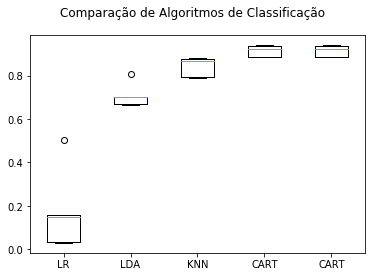

In [19]:
# Import dos módulos
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import BaseDecisionTree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Definindo os valores para o número de folds
num_folds = 5
seed = 7

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
#modelos.append(('SVM', SVC()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds)
    cv_results = cross_val_score(modelo, normalizedX_treino, y_treino, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

Com o pré processamento feito até agora, os modelos de Logistic Regression() e SVM() ficaram com a mesma avaliação em primeiro lugar.

### 03.2 - Criação do Segundo Modelo

- Segundo versão do modelo utilizando PCA como feature engineering, adequando aos algoritmos que serão testados.

#### 03.2.1 - Feature Selection

In [20]:
# Criando um novo dataset normalizado
indice_colunas = list(df_modelo.columns[:-1])

df_modelo_to_pca = pd.DataFrame(normalizedX_treino, columns = indice_colunas)
df_modelo_to_pca['TARGET'] = df_modelo['TARGET']

df_modelo_to_pca.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,0.000051,0.000587,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999997,0
1,0.000041,0.000690,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999872,0
2,0.000030,0.000342,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999999,0
3,0.000031,0.000578,0.0,0.003046,0.003046,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999962,0
4,0.000005,0.000088,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266179,0


In [21]:
df_modelo_to_pca.skew()

var3                             -30.088237
var15                              3.006487
imp_ent_var16_ult1                27.033251
imp_op_var39_comer_ult1           10.986721
imp_op_var39_comer_ult3           10.648941
imp_op_var40_comer_ult1           57.533945
imp_op_var40_comer_ult3           90.302988
imp_op_var40_efect_ult1           49.217861
imp_op_var40_efect_ult3           42.371582
imp_op_var40_ult1                 55.177408
imp_op_var41_comer_ult1           11.230576
imp_op_var41_comer_ult3           10.614304
imp_op_var41_efect_ult1           11.860406
imp_op_var41_efect_ult3           12.860856
imp_op_var41_ult1                  9.699521
imp_op_var39_efect_ult1           12.428191
imp_op_var39_efect_ult3           12.925470
imp_op_var39_ult1                  9.791999
imp_sal_var16_ult1               107.080258
ind_var1_0                        19.280497
ind_var1                          30.732590
ind_var2_0                         0.000000
ind_var2                        

In [22]:
# Para reducao de dimensionalidade será utilizado o metodo PCA - Principal Component Analysis
from sklearn.decomposition import PCA

# Carregando os dados
array_pca = df_modelo_to_pca.values

# Separando o array em componentes de input e output
x_treino_pca = array_pca[:,0:-1]
y_treino_pca = array_pca[:,-1]

# A selecao de atributos será feita em cima de todas as dimensoes
pca = PCA(n_components = None)
fit = pca.fit(x_treino_pca)

Text(0, 0.5, 'Variancia (%)')

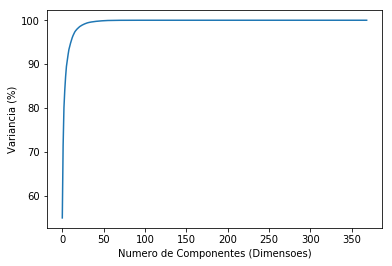

In [23]:
# Com todas as dimensoes podemos visualizar como as dimensoes se comportam explicando a variancia
# deste modo podemos ser mais assertivos quanto ao numero de componentes

plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Numero de Componentes (Dimensoes)")
plt.ylabel("Variancia (%)")

In [24]:
# Quantidade de componentes que podem explicar 99% da variancia

pca_ideal_components = np.cumsum(pca.explained_variance_ratio_ * 100)
pca_ideal_components = (pca_ideal_components < 99).sum() + 1
pca_ideal_components

27

In [25]:
# Iremos considerar como sendo 4 o numero de dimensões do PCA, que captura cerca de 90% da variancia de nossos dados
pca_consolidado = PCA(n_components = pca_ideal_components)
x_treino_pca = pca_consolidado.fit_transform(x_treino_pca)

In [26]:
# Com os dados pré processados é necessario retornar ao formato de Dataframe para o Modelo de Regressao Logistica
x_treino_pca = pd.DataFrame(x_treino_pca)
x_treino_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.047191,0.000956,0.002608,-0.007141,0.002472,0.000624,-0.000796,0.001311,-0.000263,0.001046,...,-0.000090,0.000102,-0.000966,-0.000168,-0.000362,-0.000071,0.000327,-0.000130,-0.000105,-0.000262
1,-0.039968,0.011221,-0.004250,-0.008815,0.000576,-0.002635,-0.000998,-0.000436,0.003819,-0.000568,...,-0.000106,-0.000739,0.000765,0.000364,0.000325,0.000326,0.000515,-0.000460,0.000049,-0.000476
2,-0.047162,0.000940,0.002578,-0.007058,0.002440,0.000627,-0.000828,0.001301,-0.000257,0.001036,...,-0.000090,0.000095,-0.000951,-0.000168,-0.000356,-0.000078,0.000327,-0.000132,-0.000104,-0.000261
3,-0.046299,0.000505,0.001690,-0.003626,0.000984,0.000609,-0.001136,0.001292,-0.000204,0.000846,...,-0.000074,-0.000233,-0.000444,-0.000210,-0.000105,-0.000587,-0.004678,0.002309,-0.000192,-0.000045
4,0.871908,-0.434190,-0.025824,0.120105,-0.035061,0.108341,0.555851,-0.241942,-0.046967,0.023801,...,-0.009334,-0.014530,-0.012912,0.003338,-0.004573,-0.001823,-0.016154,-0.028443,-0.000254,-0.014338


#### 03.2.2 - Seleção do Modelo

In [28]:
# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds)
    cv_results = cross_val_score(modelo, x_treino_pca, y_treino_pca, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

LR: 0.134819 (0.066335)
LDA: 0.129491 (0.066216)


KeyboardInterrupt: 

### 03.3 - Criação do Terceiro Modelo
#### 03.3.1 - Padronização dos Dados

- Segundo versão do modelo fazendo a padronização dos dados e utilizando PCA como feature engineering, adequando aos algoritmos que serão testados.

In [10]:
# Gerando os dados standarizados

from sklearn.preprocessing import StandardScaler

std_treino = StandardScaler().fit(x_treino)
stdX_treino = scaler_treino.transform(x_treino)
stdX_treino

array([[5.10135077e-05, 5.86655339e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99996621e-01],
       [4.05808400e-05, 6.89874280e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99871926e-01],
       [2.97027433e-05, 3.41581548e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99998844e-01],
       ...,
       [2.70167239e-05, 3.10692325e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99999044e-01],
       [2.37309228e-05, 2.96636535e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99999255e-01],
       [1.70486952e-05, 3.92119991e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99999565e-01]])

#### 03.3.2 - Feature Selection

In [11]:
# Criando um novo dataset normalizado
indice_colunas = list(df_modelo.columns[:-1])

df_modelo_to_pca_1 = pd.DataFrame(stdX_treino, columns = indice_colunas)
df_modelo_to_pca_1['TARGET'] = df_modelo['TARGET']

df_modelo_to_pca.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,0.000051,0.000587,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999997,0
1,0.000041,0.000690,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999872,0
2,0.000030,0.000342,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999999,0
3,0.000031,0.000578,0.0,0.003046,0.003046,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999962,0
4,0.000005,0.000088,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266179,0


In [16]:
# Para reducao de dimensionalidade será utilizado o metodo PCA - Principal Component Analysis
from sklearn.decomposition import PCA

# Carregando os dados
array_pca_std = df_modelo_to_pca_1.values

# Separando o array em componentes de input e output
x_treino_pca_std = array_pca_std[:,0:-1]
y_treino_pca_std = array_pca_std[:,-1]

# A selecao de atributos será feita em cima de todas as dimensoes
pca_std = PCA(n_components = None)
fit_std = pca_std.fit(x_treino_pca_std)

Text(0, 0.5, 'Variancia (%)')

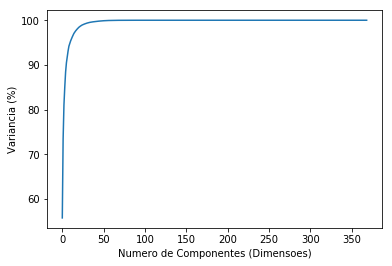

In [17]:
# Com todas as dimensoes podemos visualizar como as dimensoes se comportam explicando a variancia
# deste modo podemos ser mais assertivos quanto ao numero de componentes

plt.plot(np.cumsum(pca_std.explained_variance_ratio_ * 100))
plt.xlabel("Numero de Componentes (Dimensoes)")
plt.ylabel("Variancia (%)")

In [19]:
# Quantidade de componentes que podem explicar 99% da variancia

pca_ideal_components_std = np.cumsum(pca_std.explained_variance_ratio_ * 100)
pca_ideal_components_std = (pca_ideal_components_std < 99).sum() + 1
pca_ideal_components_std

26

In [21]:
# Iremos considerar como sendo 4 o numero de dimensões do PCA, que captura cerca de 90% da variancia de nossos dados
pca_consolidado_std = PCA(n_components = pca_ideal_components_std)
x_treino_pca_std = pca_consolidado_std.fit_transform(x_treino_pca_std)

In [22]:
# Com os dados pré processados é necessario retornar ao formato de Dataframe para o Modelo de Regressao Logistica
x_treino_pca_std = pd.DataFrame(x_treino_pca_std)
x_treino_pca_std.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.077180,0.000233,0.003280,-0.008858,0.005700,0.002071,-0.000258,-0.000430,0.001729,0.000853,...,-0.002418,0.000257,-0.000236,0.001499,-0.000239,-0.000934,0.000054,0.000043,-0.000262,0.000054
1,-0.069909,0.010619,-0.003617,-0.010617,0.005140,-0.001390,0.000838,0.003253,-0.000551,0.000364,...,-0.002167,-0.000371,-0.001287,0.000009,0.000380,0.000259,0.000177,-0.000114,0.000082,-0.000071
2,-0.077151,0.000218,0.003254,-0.008787,0.005647,0.002066,-0.000284,-0.000419,0.001707,0.000860,...,-0.002417,0.000253,-0.000242,0.001487,-0.000241,-0.000926,0.000045,0.000042,-0.000259,0.000052
3,-0.076319,-0.000167,0.002506,-0.006075,0.003483,0.001650,-0.001117,-0.000249,0.001630,0.002128,...,0.001820,0.000634,0.000719,0.001188,-0.000390,-0.000772,-0.000386,-0.000083,-0.000164,0.000105
4,0.844722,-0.419818,0.004174,0.116783,-0.103230,0.119129,0.594924,-0.163587,-0.055699,0.070385,...,-0.020142,-0.002602,-0.018605,0.012409,0.001532,-0.008927,-0.004878,-0.028256,0.015398,-0.003103


#### 03.3.3 - Seleção do Modelo

LR: 0.960418 (0.002847)
LDA: 0.959971 (0.002751)
KNN: 0.957143 (0.002742)
CART: 0.944936 (0.002402)
SVM: 0.960431 (0.002873)


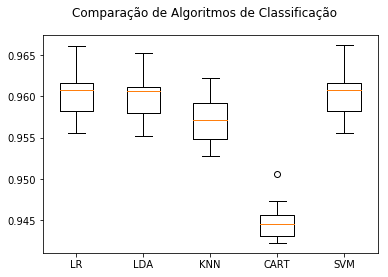

In [24]:
# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, x_treino_pca_std, y_treino_pca_std, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()